Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\igbatov\AppData\Local\conda\conda\envs\pymc3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 10500/10500 [00:21<00:00, 483.51it/s]



probAFaulty:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.054            0.016            0.000            [0.026, 0.086]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.028          0.043          0.053          0.064          0.089



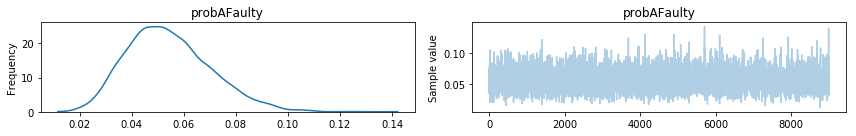

In [3]:
import numpy as np
import pandas as pd

import pymc3 as pm
import theano.tensor as T
from theano.compile.ops import as_op
import theano

from IPython.display import Image
#import utils
%matplotlib inline

with pm.Model() as model:
    probAFaulty = pm.Uniform('probAFaulty', 0, 1)
    aFaultStat = pm.Binomial('aFaultStat', n=200, p=probAFaulty, observed=10)
    
#     probBFaulty = pm.Uniform('probBFaulty', 0, 1)
#     bFaultStat = pm.Binomial('bFaultStat', n=200, p=probBFaulty, observed=15)
    
#     paf_pbf = pm.Deterministic('paf_pbf', probAFaulty - probBFaulty)
    
#     hypothesis = pm.Deterministic('hypothesis', T.switch(T.lt(paf_pbf, 0), 0, 1))
    
with model:
    SAMPLE_NUM = 10000
    trace = pm.sample(SAMPLE_NUM)
#     pm.summary(trace, varnames=['probAFaulty'], start=1000)
#     pm.traceplot(trace[1000:], varnames=['probAFaulty'])
    
#     pm.summary(trace, varnames=['probBFaulty'], start=1000)
#     pm.traceplot(trace[1000:], varnames=['probBFaulty'])
    
#     pm.summary(trace, varnames=['paf_pbf'], start=1000)    
#     pm.traceplot(trace[1000:], varnames=['paf_pbf'])
    
#     pm.summary(trace, varnames=['hypothesis'], start=1000)    
#     pm.traceplot(trace[1000:], varnames=['hypothesis'])
 
    pm.summary(trace, varnames=['probAFaulty'], start=1000)    
    pm.traceplot(trace[1000:], varnames=['probAFaulty'])